# Safety Dataset Machine Learning Modeling
by Prince Joseph Erneszer Javier

## Executive Summary

## Introduction

## About the Data

## Preprocessing for Models

In [3]:
# loading packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import glob
import pickle
import ast

from collections import Counter
import multiprocessing

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.simplefilter('ignore')

n_jobs = multiprocessing.cpu_count()

In [4]:
# load dataset for machine learning
df_for_ml = pd.read_csv("data/processed/df_for_ml.csv")

Counter({1: 4737, 0: 4737})


Text(0, 0.5, 'counts')

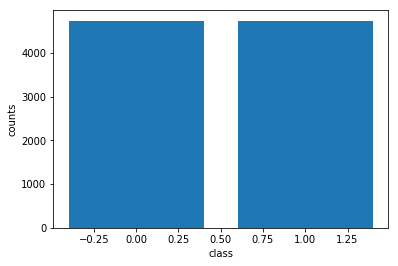

In [5]:
# number of samples per class
print(Counter(df_for_ml.label))
y = Counter(df_for_ml.label).values()
x = Counter(df_for_ml.label).keys()

plt.bar(x, y)
plt.xlabel("class")
plt.ylabel("counts")

In [5]:
# no need for train test splitting since we will be using kfold validation
# we have already set aside a 5% test set above

In [6]:
X_train = df_for_ml.drop("label", axis=1)
y_train = df_for_ml["label"]

In [7]:
X_train.head()

,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Accuracy_dominant_f,Accuracy_max_power,Bearing_amin,...,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,Speed_dominant_f,Speed_max_power,trip_len
0,3.198,5.5,2.302,3.894792,0.893479,0.814521,-1.091455,0.007937,0.192704,68.000000,...,0.0,17.351286,17.351286,2.504549,4.266055,1.843148,2.462901,0.007937,3.809542,630.0
1,10.000,10.0,0.000,10.000000,0.000000,0.000000,-3.000000,0.500000,0.000000,0.111948,...,0.0,26.559999,26.559999,11.350061,9.052287,0.157259,-1.598451,0.001214,37.976315,824.0
2,3.000,4.6,1.600,3.744292,0.337499,-1.529162,0.906031,0.004167,0.035798,1.000000,...,0.0,16.400080,16.400080,9.447364,4.975110,-0.563249,-0.972619,0.004167,12.533629,240.0
3,3.000,24.0,21.000,4.262047,1.120936,5.060578,54.870297,0.000394,0.100700,0.000000,...,0.0,26.564178,26.564178,15.719868,7.639410,-0.636798,-0.791403,0.000394,38.914546,2535.0
4,3.000,1476.0,1473.000,15.819278,114.035648,10.749030,118.580033,0.002484,261.083307,0.000000,...,-1.0,23.463644,24.463644,7.202245,7.820243,0.586466,-1.179417,0.001242,17.608936,805.0


In [8]:
y_train[:5]

0    1
1    1
2    0
3    1
4    0
Name: label, dtype: int64

In [9]:
# Scaling
mmsc = MinMaxScaler()
stdsc = StandardScaler()

In [10]:
# scale the training set minmax/standard
scaler = "minmax"

if scaler == "std":
    sc = stdsc.fit(X_train)
elif scaler== "minmax":
    sc = mmsc.fit(X_train)
    
# save scaler
scalerfile = f'scalers/{scaler}.sav'
pickle.dump(sc, open(scalerfile, 'wb'))

feature_cols = X_train.columns
    
X_train = sc.transform(X_train)
X_train = pd.DataFrame(X_train, columns=feature_cols)

X_train.head()

,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Accuracy_dominant_f,Accuracy_max_power,Bearing_amin,...,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,Speed_dominant_f,Speed_max_power,trip_len
0,0.001732,0.000371,0.000380,0.001324,0.000365,0.238994,0.000728,0.015873,5.870572e-08,0.224194,...,0.080199,0.123148,0.116437,0.127702,0.323489,0.496336,0.039251,0.015415,0.027671,0.068539
1,0.006545,0.001114,0.000000,0.005344,0.000000,0.226189,0.000000,1.000000,0.000000e+00,0.000369,...,0.080199,0.184943,0.178233,0.450022,0.686422,0.402090,0.010070,0.001963,0.275847,0.094611
2,0.001592,0.000223,0.000264,0.001225,0.000138,0.202149,0.001490,0.008333,1.090549e-08,0.003297,...,0.080199,0.116764,0.110054,0.380690,0.377255,0.361812,0.014567,0.007872,0.091040,0.016127
3,0.001592,0.003424,0.003469,0.001566,0.000458,0.305747,0.022072,0.000789,3.067737e-08,0.000000,...,0.080199,0.184971,0.178261,0.609252,0.579285,0.357700,0.015869,0.000324,0.282662,0.324553
4,0.001592,0.243038,0.243350,0.009175,0.046594,0.395175,0.046372,0.004969,7.953707e-05,0.000000,...,0.040100,0.164165,0.164165,0.298880,0.592998,0.426084,0.013081,0.002021,0.127905,0.092058


In [11]:
# PCA?
# are there visible clusters if we perform and look at it in 3d?

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)

In [12]:
len(X_train.columns)

82

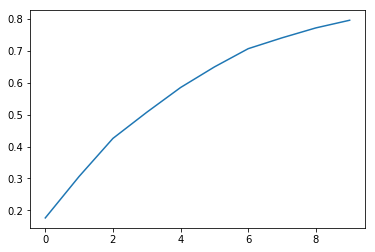

array([0.17614781, 0.30614159, 0.42539213, 0.50726339, 0.58488945,
       0.64937846, 0.70663139, 0.74063867, 0.77175954, 0.79577307])

In [13]:
# explained variance ratio of first 10 principal components
# first 10 principal components explain 80% of the variance
plt.plot(np.cumsum(pca.explained_variance_ratio_[:10]))
plt.show()
np.cumsum(pca.explained_variance_ratio_[:10])

In [14]:
# plot in 3D with label colors
principalDf.iloc[:, 0:3].head()

,0,1,2
0,0.427286,-0.090782,-0.413162
1,0.152066,0.556672,-0.077387
2,-0.242597,-0.055460,-0.166297
3,0.243868,-0.128013,-0.182196
4,0.702300,-0.600646,0.419480


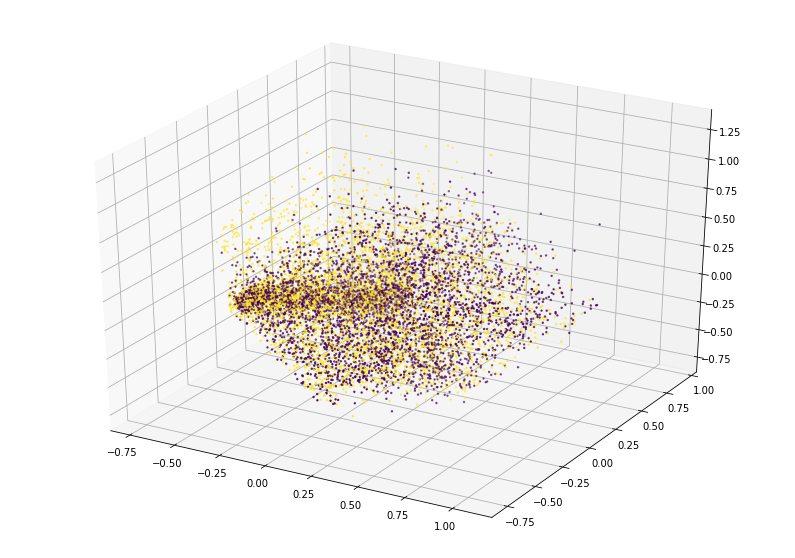

In [15]:
# plotting on the first 3 principal components
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')

c = y_train
ax.scatter3D(principalDf.iloc[:, 0], principalDf.iloc[:, 1], principalDf.iloc[:, 2], c=c, cmap='viridis', s=2)


## Accuracy to Beat - PCC

In [16]:
# proportional chance criterion
state_counts = Counter(y_train)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
num = (df_state[0] / df_state[0].sum())**2
pcc = np.round(num.sum(), 2)
pcc

0.5

## Machine Learning Models

In [17]:
models_results = {'model':[], 'valid_acc':[], 'params':[]}

### Logistic Regression

In [20]:
param_grid = {'penalty':['l1', 'l2'], 'C':[0.01, 0.1, 0.5, 0.75, 1., 10, 100]}

clf = LogisticRegression()

logreg = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
logreg.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 0.5, 0.75, 1.0, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6293012455140384
Best parameters: {'C': 100, 'penalty': 'l2'}


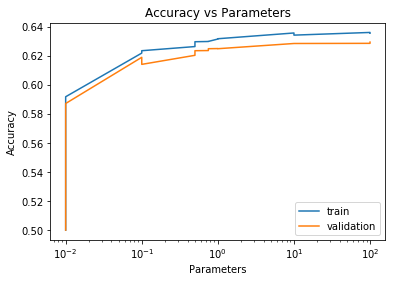

In [21]:
# calculate results
model_name = 'log_reg'
model = logreg
results = pd.DataFrame(model.cv_results_)
params = results.param_C
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.coef_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Linear SVC L1

In [22]:
param_grid = {'penalty':['l1'], 'dual':[False], 'C':[0.01, 0.1, 0.5, 0.75, 1., 10, 100, 1000]}
clf = LinearSVC()

lsvcl1 = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
lsvcl1.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'penalty': ['l1'], 'dual': [False], 'C': [0.01, 0.1, 0.5, 0.75, 1.0, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6297234536626557
Best parameters: {'C': 10, 'dual': False, 'penalty': 'l1'}


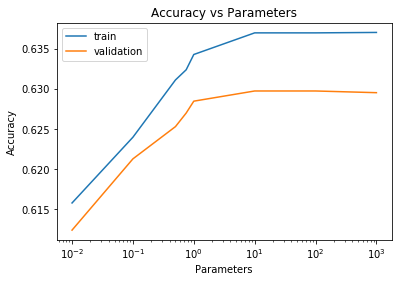

In [23]:
# calculate results
model_name = 'linear_svc_l1'
model = lsvcl1
results = pd.DataFrame(model.cv_results_)
params = results.param_C
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.coef_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Linear SVC L2

In [24]:
param_grid = {'penalty':['l2'], 'loss':['hinge'], 'C':[0.01, 0.1, 0.5, 0.75, 1., 10, 100, 1000]}

clf = LinearSVC()

lsvcl2 = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
lsvcl2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'penalty': ['l2'], 'loss': ['hinge'], 'C': [0.01, 0.1, 0.5, 0.75, 1.0, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6291956934768841
Best parameters: {'C': 0.75, 'loss': 'hinge', 'penalty': 'l2'}


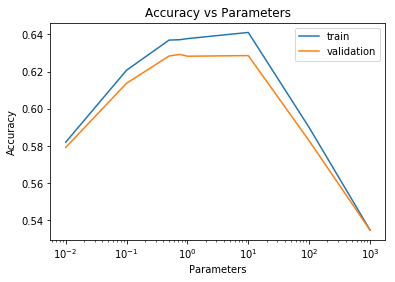

In [25]:
# calculate results
model_name = 'linear_svc_l2'
model = lsvcl2
results = pd.DataFrame(model.cv_results_)
params = results.param_C
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.coef_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Nonlinear SVC

In [26]:
param_grid = {'C':[0.1, 0.5, 0.75, 1., 10, 100, 1000, 2000]}

clf = SVC()

svc = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
svc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'C': [0.1, 0.5, 0.75, 1.0, 10, 100, 1000, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.632467806628668
Best parameters: {'C': 1000}


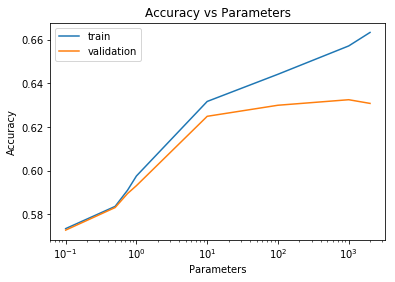

In [27]:
# calculate results
model_name = 'svc'
model = svc
results = pd.DataFrame(model.cv_results_)
params = results.param_C
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

### GBM

In [28]:
param_grid = {'learning_rate':[0.01, 0.05, 0.1], "n_estimators":[500], "max_depth":[2, 3, 4, 5]}

clf = GradientBoostingClassifier()

gbm = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
gbm.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [500], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6310956301456618
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


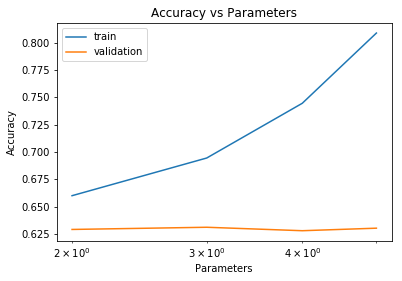

In [29]:
# calculate results
model_name = 'gbm'
model = gbm
results = pd.DataFrame(model.cv_results_)
params = results[results.param_learning_rate==0.01].param_max_depth
train_score = results[results.param_learning_rate==0.01].mean_train_score
valid_score = results[results.param_learning_rate==0.01].mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.feature_importances_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Random Forest

In [30]:
param_grid = {'min_samples_split':[2, 3, 4], "max_depth":[2, 3, 4, 5]}

clf = RandomForestClassifier()

rf = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'min_samples_split': [2, 3, 4], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.621490394764619
Best parameters: {'max_depth': 5, 'min_samples_split': 2}


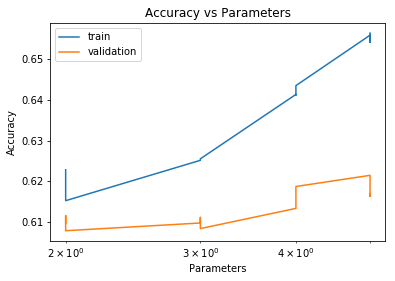

In [31]:
# calculate results
model_name = 'rf'
model = rf
results = pd.DataFrame(model.cv_results_)
params = results.param_max_depth
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.feature_importances_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Decision Tree

In [32]:
param_grid = {'min_samples_split':[2, 3, 4], "max_depth":[2, 3, 4, 5]}

clf = DecisionTreeClassifier()

dt = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
dt.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'min_samples_split': [2, 3, 4], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6027021321511505
Best parameters: {'max_depth': 2, 'min_samples_split': 2}


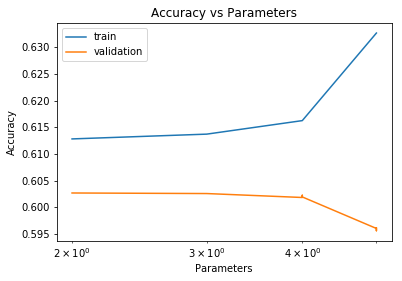

In [33]:
# calculate results
model_name = 'dt'
model = dt
results = pd.DataFrame(model.cv_results_)
params = results.param_max_depth
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.feature_importances_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Naive Bayes

In [34]:
param_grid = {'var_smoothing':[1e-9, 1e-5, 1e-1]}
clf = GaussianNB()

nb = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
nb.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=36,
       param_grid={'var_smoothing': [1e-09, 1e-05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.5486594891281402
Best parameters: {'var_smoothing': 1e-05}


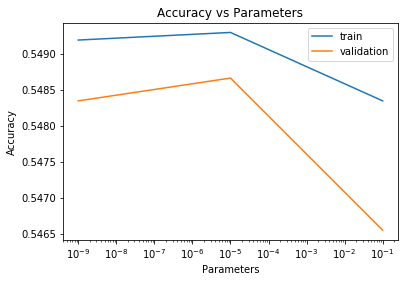

In [35]:
# calculate results
model_name = 'nb'
model = nb
results = pd.DataFrame(model.cv_results_)
params = results.param_var_smoothing
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

In [36]:
results = pd.DataFrame(models_results).sort_values(by="valid_acc", ascending=False)
results.drop_duplicates(subset="valid_acc", inplace=True)

In [37]:
# save to csv
results.to_csv(f"results/ml_results_{scaler}_pcc-{pcc}_.csv", index=False)

In [19]:
# results from standard scaler
pd.set_option('display.max_colwidth', -1)
pd.read_csv("results/ml_results_std_pcc-0.5_.csv").drop_duplicates(subset="model")

,model,valid_acc,params
0,gbm,0.630779,"{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}"
1,linear_svc_l1,0.629512,"{'C': 0.75, 'dual': False, 'penalty': 'l1'}"
2,log_reg,0.628985,"{'C': 0.1, 'penalty': 'l2'}"
3,linear_svc_l2,0.628457,"{'C': 0.01, 'loss': 'hinge', 'penalty': 'l2'}"
4,svc,0.626662,{'C': 1.0}
5,rf,0.620013,"{'max_depth': 3, 'min_samples_split': 4}"
6,dt,0.602702,"{'max_depth': 2, 'min_samples_split': 2}"
7,nb,0.548343,{'var_smoothing': 1e-09}


In [18]:
# results from minmax scaler
pd.set_option('display.max_colwidth', -1)
pd.read_csv("results/ml_results_minmax_pcc-0.5_.csv").drop_duplicates(subset="model")

,model,valid_acc,params
0,svc,0.632468,{'C': 1000}
1,gbm,0.631096,"{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}"
2,linear_svc_l1,0.629723,"{'C': 10, 'dual': False, 'penalty': 'l1'}"
3,log_reg,0.629301,"{'C': 100, 'penalty': 'l2'}"
4,linear_svc_l2,0.629196,"{'C': 0.75, 'loss': 'hinge', 'penalty': 'l2'}"
5,rf,0.621490,"{'max_depth': 5, 'min_samples_split': 2}"
6,dt,0.602702,"{'max_depth': 2, 'min_samples_split': 2}"
7,nb,0.548659,{'var_smoothing': 1e-05}


### Most Predictive Features According to the Best ML Model

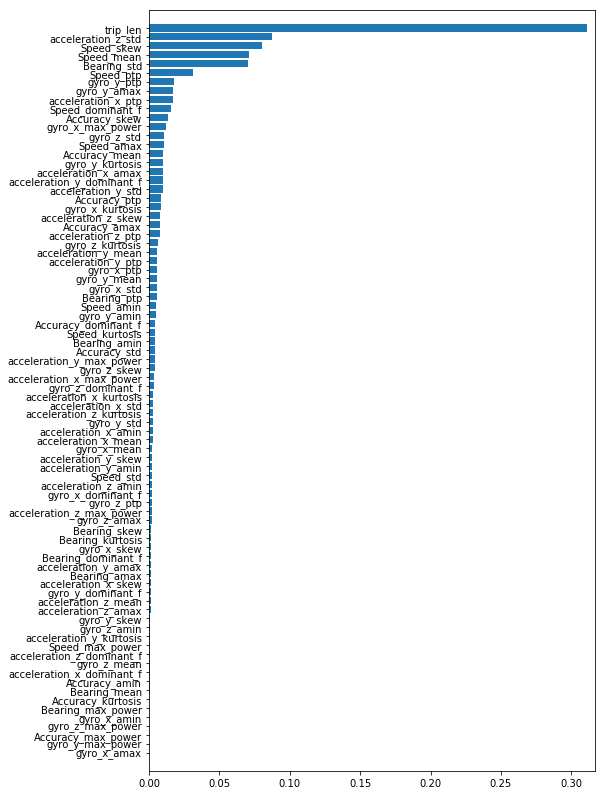

In [58]:
# GBM can be used for feature importances
filepath = f'results/gbm_{scaler}_feature_importances.sav'
feature_importances = pickle.load(open(filepath, 'rb')).flatten()

plt.figure(figsize=(8, 14))
y = feature_importances
inds = np.argsort(y)
y = y[inds]
x = feature_cols[inds]
plt.barh(x, y)
plt.margins(0.02)

## Using Only Top 30 features

In [59]:
models_results_b = {"features":[], "model":[], "params":[], "valid_acc":[]}

In [60]:
# feats from most important down
top_feats = list(x[::-1][:30])
top_feats

['trip_len',
 'acceleration_z_std',
 'Speed_skew',
 'Speed_mean',
 'Bearing_std',
 'Speed_ptp',
 'gyro_y_ptp',
 'gyro_y_amax',
 'acceleration_x_ptp',
 'Speed_dominant_f',
 'Accuracy_skew',
 'gyro_x_max_power',
 'gyro_z_std',
 'Speed_amax',
 'Accuracy_mean',
 'gyro_y_kurtosis',
 'acceleration_x_amax',
 'acceleration_y_dominant_f',
 'acceleration_y_std',
 'Accuracy_ptp',
 'gyro_x_kurtosis',
 'acceleration_z_skew',
 'Accuracy_amax',
 'acceleration_z_ptp',
 'gyro_z_kurtosis',
 'acceleration_y_mean',
 'acceleration_y_ptp',
 'gyro_x_ptp',
 'gyro_y_mean',
 'gyro_x_std']

In [61]:
X_train_b = X_train[top_feats]
X_train_b.shape

(9474, 30)

### Linear SVC L1

In [62]:
param_path = f"results/linear_svc_l1_{scaler}_best_params.sav"
best_params = pickle.load(open(param_path, 'rb'))
param_grid = {k:[v] for k, v in best_params.items()}

clf = LinearSVC()
lsvcl1 = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)

model = lsvcl1
model_name = 'linear_svc_l1_b'

model.fit(X_train_b, y_train)

# calculate results
results = pd.DataFrame(model.cv_results_)
valid_score = results.mean_test_score.values[0] 

# saving to dictionary of models and results
models_results_b["features"] += [top_feats]
models_results_b["model"] += [model_name]
models_results_b["params"] += [model.best_params_]
models_results_b["valid_acc"] += [model.best_score_]
            
model.fit(X_train_b, y_train)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

Best validation accuracy: 0.6244458518049398
Best parameters: {'C': 10, 'dual': False, 'penalty': 'l1'}


### Linear SVC L2

In [63]:
param_path = f"results/linear_svc_l2_{scaler}_best_params.sav"
best_params = pickle.load(open(param_path, 'rb'))
param_grid = {k:[v] for k, v in best_params.items()}

clf = LinearSVC()
lsvcl2 = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)

model = lsvcl2
model_name = 'linear_svc_l2_b'

model.fit(X_train_b, y_train)

# calculate results
results = pd.DataFrame(model.cv_results_)
valid_score = results.mean_test_score.values[0] 

# saving to dictionary of models and results
models_results_b["features"] += [top_feats]
models_results_b["model"] += [model_name]
models_results_b["params"] += [model.best_params_]
models_results_b["valid_acc"] += [model.best_score_]
            
model.fit(X_train_b, y_train)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

Best validation accuracy: 0.6306734219970446
Best parameters: {'C': 0.75, 'loss': 'hinge', 'penalty': 'l2'}


### Nonlinear SVC

In [64]:
param_path = f"results/svc_{scaler}_best_params.sav"
best_params = pickle.load(open(param_path, 'rb'))
param_grid = {k:[v] for k, v in best_params.items()}

clf = SVC()
svc = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)

model = svc
model_name = 'svc_b'

model.fit(X_train_b, y_train)

# calculate results
results = pd.DataFrame(model.cv_results_)
valid_score = results.mean_test_score.values[0] 

# saving to dictionary of models and results
models_results_b["features"] += [top_feats]
models_results_b["model"] += [model_name]
models_results_b["params"] += [model.best_params_]
models_results_b["valid_acc"] += [model.best_score_]
            
model.fit(X_train_b, y_train)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

Best validation accuracy: 0.6325733586658222
Best parameters: {'C': 1000}


### GBM

In [65]:
param_path = f"results/gbm_{scaler}_best_params.sav"
best_params = pickle.load(open(param_path, 'rb'))
param_grid = {k:[v] for k, v in best_params.items()}

clf = GradientBoostingClassifier()
gbm_b = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)


model = gbm_b
model_name = 'gbm_b'

model.fit(X_train_b, y_train)

# calculate results
results = pd.DataFrame(model.cv_results_)
valid_score = results.mean_test_score.values[0] 

# saving to dictionary of models and results
models_results_b["features"] += [top_feats]
models_results_b["model"] += [model_name]
models_results_b["params"] += [model.best_params_]
models_results_b["valid_acc"] += [model.best_score_]
            
model.fit(X_train_b, y_train)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

Best validation accuracy: 0.6293012455140384
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


In [67]:
results = pd.DataFrame(models_results_b).sort_values(by="valid_acc", ascending=False)
results.drop_duplicates(subset="valid_acc", inplace=True)
results

,features,model,params,valid_acc
2,"[trip_len, acceleration_z_std, Speed_skew, Speed_mean, Bearing_std, Speed_ptp, gyro_y_ptp, gyro_y_amax, acceleration_x_ptp, Speed_dominant_f, Accuracy_skew, gyro_x_max_power, gyro_z_std, Speed_amax, Accuracy_mean, gyro_y_kurtosis, acceleration_x_amax, acceleration_y_dominant_f, acceleration_y_std, Accuracy_ptp, gyro_x_kurtosis, acceleration_z_skew, Accuracy_amax, acceleration_z_ptp, gyro_z_kurtosis, acceleration_y_mean, acceleration_y_ptp, gyro_x_ptp, gyro_y_mean, gyro_x_std]",svc_b,{'C': 1000},0.632573
1,"[trip_len, acceleration_z_std, Speed_skew, Speed_mean, Bearing_std, Speed_ptp, gyro_y_ptp, gyro_y_amax, acceleration_x_ptp, Speed_dominant_f, Accuracy_skew, gyro_x_max_power, gyro_z_std, Speed_amax, Accuracy_mean, gyro_y_kurtosis, acceleration_x_amax, acceleration_y_dominant_f, acceleration_y_std, Accuracy_ptp, gyro_x_kurtosis, acceleration_z_skew, Accuracy_amax, acceleration_z_ptp, gyro_z_kurtosis, acceleration_y_mean, acceleration_y_ptp, gyro_x_ptp, gyro_y_mean, gyro_x_std]",linear_svc_l2_b,"{'C': 0.75, 'loss': 'hinge', 'penalty': 'l2'}",0.630779
3,"[trip_len, acceleration_z_std, Speed_skew, Speed_mean, Bearing_std, Speed_ptp, gyro_y_ptp, gyro_y_amax, acceleration_x_ptp, Speed_dominant_f, Accuracy_skew, gyro_x_max_power, gyro_z_std, Speed_amax, Accuracy_mean, gyro_y_kurtosis, acceleration_x_amax, acceleration_y_dominant_f, acceleration_y_std, Accuracy_ptp, gyro_x_kurtosis, acceleration_z_skew, Accuracy_amax, acceleration_z_ptp, gyro_z_kurtosis, acceleration_y_mean, acceleration_y_ptp, gyro_x_ptp, gyro_y_mean, gyro_x_std]",gbm_b,"{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}",0.629301
0,"[trip_len, acceleration_z_std, Speed_skew, Speed_mean, Bearing_std, Speed_ptp, gyro_y_ptp, gyro_y_amax, acceleration_x_ptp, Speed_dominant_f, Accuracy_skew, gyro_x_max_power, gyro_z_std, Speed_amax, Accuracy_mean, gyro_y_kurtosis, acceleration_x_amax, acceleration_y_dominant_f, acceleration_y_std, Accuracy_ptp, gyro_x_kurtosis, acceleration_z_skew, Accuracy_amax, acceleration_z_ptp, gyro_z_kurtosis, acceleration_y_mean, acceleration_y_ptp, gyro_x_ptp, gyro_y_mean, gyro_x_std]",linear_svc_l1_b,"{'C': 10, 'dual': False, 'penalty': 'l1'}",0.623813


In [68]:
# save to csv
results.to_csv(f"results/ml_results_b_{scaler}.csv", index=False)

In [70]:
# results from standard scaler
pd.set_option('display.max_colwidth', -1)
pd.read_csv(f"results/ml_results_b_{scaler}.csv").drop_duplicates(subset="model")

,features,model,params,valid_acc
0,"['trip_len', 'acceleration_z_std', 'Speed_skew', 'Speed_mean', 'Bearing_std', 'Speed_ptp', 'gyro_y_ptp', 'gyro_y_amax', 'acceleration_x_ptp', 'Speed_dominant_f', 'Accuracy_skew', 'gyro_x_max_power', 'gyro_z_std', 'Speed_amax', 'Accuracy_mean', 'gyro_y_kurtosis', 'acceleration_x_amax', 'acceleration_y_dominant_f', 'acceleration_y_std', 'Accuracy_ptp', 'gyro_x_kurtosis', 'acceleration_z_skew', 'Accuracy_amax', 'acceleration_z_ptp', 'gyro_z_kurtosis', 'acceleration_y_mean', 'acceleration_y_ptp', 'gyro_x_ptp', 'gyro_y_mean', 'gyro_x_std']",svc_b,{'C': 1000},0.632573
1,"['trip_len', 'acceleration_z_std', 'Speed_skew', 'Speed_mean', 'Bearing_std', 'Speed_ptp', 'gyro_y_ptp', 'gyro_y_amax', 'acceleration_x_ptp', 'Speed_dominant_f', 'Accuracy_skew', 'gyro_x_max_power', 'gyro_z_std', 'Speed_amax', 'Accuracy_mean', 'gyro_y_kurtosis', 'acceleration_x_amax', 'acceleration_y_dominant_f', 'acceleration_y_std', 'Accuracy_ptp', 'gyro_x_kurtosis', 'acceleration_z_skew', 'Accuracy_amax', 'acceleration_z_ptp', 'gyro_z_kurtosis', 'acceleration_y_mean', 'acceleration_y_ptp', 'gyro_x_ptp', 'gyro_y_mean', 'gyro_x_std']",linear_svc_l2_b,"{'C': 0.75, 'loss': 'hinge', 'penalty': 'l2'}",0.630779
2,"['trip_len', 'acceleration_z_std', 'Speed_skew', 'Speed_mean', 'Bearing_std', 'Speed_ptp', 'gyro_y_ptp', 'gyro_y_amax', 'acceleration_x_ptp', 'Speed_dominant_f', 'Accuracy_skew', 'gyro_x_max_power', 'gyro_z_std', 'Speed_amax', 'Accuracy_mean', 'gyro_y_kurtosis', 'acceleration_x_amax', 'acceleration_y_dominant_f', 'acceleration_y_std', 'Accuracy_ptp', 'gyro_x_kurtosis', 'acceleration_z_skew', 'Accuracy_amax', 'acceleration_z_ptp', 'gyro_z_kurtosis', 'acceleration_y_mean', 'acceleration_y_ptp', 'gyro_x_ptp', 'gyro_y_mean', 'gyro_x_std']",gbm_b,"{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}",0.629301
3,"['trip_len', 'acceleration_z_std', 'Speed_skew', 'Speed_mean', 'Bearing_std', 'Speed_ptp', 'gyro_y_ptp', 'gyro_y_amax', 'acceleration_x_ptp', 'Speed_dominant_f', 'Accuracy_skew', 'gyro_x_max_power', 'gyro_z_std', 'Speed_amax', 'Accuracy_mean', 'gyro_y_kurtosis', 'acceleration_x_amax', 'acceleration_y_dominant_f', 'acceleration_y_std', 'Accuracy_ptp', 'gyro_x_kurtosis', 'acceleration_z_skew', 'Accuracy_amax', 'acceleration_z_ptp', 'gyro_z_kurtosis', 'acceleration_y_mean', 'acceleration_y_ptp', 'gyro_x_ptp', 'gyro_y_mean', 'gyro_x_std']",linear_svc_l1_b,"{'C': 10, 'dual': False, 'penalty': 'l1'}",0.623813


## Incremental Adding of Features from Most Predictive

In [71]:
models_results_c = {"features":[], "model":[], "params":[], "valid_acc":[]}
# feats from most important down
top_feats = list(x[::-1])

### Nonlinear SVC

In [72]:
param_path = f"results/svc_{scaler}_best_params.sav"
best_params = pickle.load(open(param_path, 'rb'))
param_grid = {k:[v] for k, v in best_params.items()}

clf = SVC()
svc_c = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)

valid_accs = []
feats_c = []
best_score = 0

model = svc_c
model_name = 'svc_c'

# checking features one by one
for i in range(len(top_feats)):
    feats_c += [top_feats[i]]
    X_train_c = X_train[feats_c]

    model.fit(X_train_c, y_train)

    # calculate results
    results = pd.DataFrame(model.cv_results_)
    valid_score = results.mean_test_score.values[0]

    if valid_score > best_score:
        best_score = valid_score
        valid_accs.append(valid_score)

        # print accuracies and parameters
        print("Best validation accuracy:", best_score)
        
    else:
        feats_c = feats_c[:-1]

models_results_c["features"] += [feats_c]
models_results_c["model"] += [model_name]
models_results_c["params"] += [model.best_params_]
models_results_c["valid_acc"] += [best_score] 
            
X_train_c = X_train[feats_c]
model.fit(X_train_c, y_train)
print(feats_c)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

Best validation accuracy: 0.5881359510238547
Best validation accuracy: 0.608507494194638
Best validation accuracy: 0.6205404264302301
Best validation accuracy: 0.625818028287946
Best validation accuracy: 0.6264513405108718
Best validation accuracy: 0.6274013088452607
Best validation accuracy: 0.6287734853282668
Best validation accuracy: 0.6293012455140384
Best validation accuracy: 0.630145661811273
Best validation accuracy: 0.6306734219970446
Best validation accuracy: 0.6307789740341989
Best validation accuracy: 0.6308845260713531
Best validation accuracy: 0.6345788473717543
Best validation accuracy: 0.6346843994089086
['trip_len', 'acceleration_z_std', 'Speed_skew', 'Speed_ptp', 'gyro_y_ptp', 'Speed_dominant_f', 'Accuracy_skew', 'gyro_x_max_power', 'Speed_amax', 'Accuracy_ptp', 'acceleration_y_mean', 'acceleration_y_max_power', 'Speed_std', 'gyro_z_ptp']


### Linear SVC L1

In [73]:
param_path = f"results/linear_svc_l1_{scaler}_best_params.sav"
best_params = pickle.load(open(param_path, 'rb'))
param_grid = {k:[v] for k, v in best_params.items()}

clf = LinearSVC()
lsvcl1_c = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)

valid_accs = []
feats_c = []
best_score = 0

model = lsvcl1_c
model_name = 'linear_svc_l1_c'

# checking features one by one
for i in range(len(top_feats)):
    feats_c += [top_feats[i]]
    X_train_c = X_train[feats_c]

    model.fit(X_train_c, y_train)

    # calculate results
    results = pd.DataFrame(model.cv_results_)
    valid_score = results.mean_test_score.values[0]

    if valid_score > best_score:
        best_score = valid_score
        valid_accs.append(valid_score)

        # print accuracies and parameters
        print("Best validation accuracy:", best_score)
        
    else:
        feats_c = feats_c[:-1]

models_results_c["features"] += [feats_c]
models_results_c["model"] += [model_name]
models_results_c["params"] += [model.best_params_]
models_results_c["valid_acc"] += [best_score] 
            
X_train_c = X_train[feats_c]
model.fit(X_train_c, y_train)
print(feats_c)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

Best validation accuracy: 0.5946801773274224
Best validation accuracy: 0.612518471606502
Best validation accuracy: 0.6198015621701499
Best validation accuracy: 0.6199071142073042
Best validation accuracy: 0.621490394764619
Best validation accuracy: 0.6223348110618535
Best validation accuracy: 0.623179227359088
Best validation accuracy: 0.6233903314333966
Best validation accuracy: 0.6236014355077053
Best validation accuracy: 0.6238125395820139
Best validation accuracy: 0.625501372176483
Best validation accuracy: 0.6256069242136373
Best validation accuracy: 0.6259235803251003
Best validation accuracy: 0.6262402364365632
Best validation accuracy: 0.6263457884737176
Best validation accuracy: 0.6267679966223348
Best validation accuracy: 0.6280346210681866
['trip_len', 'acceleration_z_std', 'Speed_skew', 'Speed_ptp', 'gyro_y_ptp', 'gyro_y_amax', 'Speed_dominant_f', 'gyro_z_std', 'Bearing_ptp', 'gyro_y_amin', 'Accuracy_std', 'acceleration_y_max_power', 'acceleration_x_max_power', 'acceleratio

### Linear SVC L2

In [74]:
param_path = f"results/linear_svc_l2_{scaler}_best_params.sav"
best_params = pickle.load(open(param_path, 'rb'))
param_grid = {k:[v] for k, v in best_params.items()}

clf = LinearSVC()
lsvcl2_c = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)

valid_accs = []
feats_c = []
best_score = 0

model = lsvcl2_c
model_name = 'linear_svc_l2_c'

# checking features one by one
for i in range(len(top_feats)):
    feats_c += [top_feats[i]]
    X_train_c = X_train[feats_c]

    model.fit(X_train_c, y_train)

    # calculate results
    results = pd.DataFrame(model.cv_results_)
    valid_score = results.mean_test_score.values[0]

    if valid_score > best_score:
        best_score = valid_score
        valid_accs.append(valid_score)

        # print accuracies and parameters
        print("Best validation accuracy:", best_score)
        
    else:
        feats_c = feats_c[:-1]

models_results_c["features"] += [feats_c]
models_results_c["model"] += [model_name]
models_results_c["params"] += [model.best_params_]
models_results_c["valid_acc"] += [best_score] 
            
X_train_c = X_train[feats_c]
model.fit(X_train_c, y_train)
print(feats_c)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

Best validation accuracy: 0.5960523538104285
Best validation accuracy: 0.6134684399408908
Best validation accuracy: 0.6202237703187672
Best validation accuracy: 0.6220181549503906
Best validation accuracy: 0.6226514671733164
Best validation accuracy: 0.6228625712476251
Best validation accuracy: 0.6236014355077053
Best validation accuracy: 0.6238125395820139
['trip_len', 'acceleration_z_std', 'Speed_skew', 'acceleration_x_ptp', 'Speed_dominant_f', 'Speed_amax', 'gyro_y_kurtosis', 'Accuracy_ptp']


### GBM

In [75]:
param_path = f"results/gbm_{scaler}_best_params.sav"
best_params = pickle.load(open(param_path, 'rb'))
param_grid = {k:[v] for k, v in best_params.items()}

clf = GradientBoostingClassifier()

gbm_c = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)

valid_accs = []
feats_c = []
best_score = 0

model = gbm_c
model_name = 'gbm_c'

# checking features one by one
for i in range(len(top_feats)):
    feats_c += [top_feats[i]]
    X_train_c = X_train[feats_c]

    model.fit(X_train_c, y_train)

    # calculate results
    results = pd.DataFrame(model.cv_results_)
    valid_score = results.mean_test_score.values[0]

    if valid_score > best_score:
        best_score = valid_score
        valid_accs.append(valid_score)

        # print accuracies and parameters
        print("Best validation accuracy:", best_score)
        
    else:
        feats_c = feats_c[:-1]

models_results_c["features"] += [feats_c]
models_results_c["model"] += [model_name]
models_results_c["params"] += [model.best_params_]
models_results_c["valid_acc"] += [best_score] 
            
X_train_c = X_train[feats_c]
model.fit(X_train_c, y_train)
print(feats_c)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

Best validation accuracy: 0.5901414397297868
Best validation accuracy: 0.608190838083175
Best validation accuracy: 0.6181127295756809
Best validation accuracy: 0.6203293223559214
Best validation accuracy: 0.6288790373654212
Best validation accuracy: 0.6306734219970446
Best validation accuracy: 0.6315178382942791
Best validation accuracy: 0.6326789107029765
Best validation accuracy: 0.6335233270002111
Best validation accuracy: 0.6336288790373654
Best validation accuracy: 0.6355288157061432
Best validation accuracy: 0.6373232003377666
Best validation accuracy: 0.6374287523749208
Best validation accuracy: 0.6383787207093097
['trip_len', 'acceleration_z_std', 'Speed_skew', 'Speed_mean', 'Speed_ptp', 'gyro_y_amax', 'Accuracy_skew', 'gyro_y_kurtosis', 'Speed_amin', 'Accuracy_dominant_f', 'Bearing_amin', 'gyro_z_dominant_f', 'acceleration_z_amax', 'gyro_z_mean']


In [76]:
results_c = pd.DataFrame(models_results_c).sort_values(by="valid_acc", ascending=False)
results_c.iloc[:, 1:]

,model,params,valid_acc
3,gbm_c,"{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}",0.638379
0,svc_c,{'C': 1000},0.634684
1,linear_svc_l1_c,"{'C': 10, 'dual': False, 'penalty': 'l1'}",0.628035
2,linear_svc_l2_c,"{'C': 0.75, 'loss': 'hinge', 'penalty': 'l2'}",0.623813


In [77]:
# save to csv
results_c.drop_duplicates("model").to_csv(f"results/ml_results_c_{scaler}.csv", index=False)

In [78]:
pd.read_csv("results/ml_results_c_minmax.csv")

,features,model,params,valid_acc
0,"['trip_len', 'acceleration_z_std', 'Speed_skew', 'Speed_mean', 'Speed_ptp', 'gyro_y_amax', 'Accuracy_skew', 'gyro_y_kurtosis', 'Speed_amin', 'Accuracy_dominant_f', 'Bearing_amin', 'gyro_z_dominant_f', 'acceleration_z_amax', 'gyro_z_mean']",gbm_c,"{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}",0.638379
1,"['trip_len', 'acceleration_z_std', 'Speed_skew', 'Speed_ptp', 'gyro_y_ptp', 'Speed_dominant_f', 'Accuracy_skew', 'gyro_x_max_power', 'Speed_amax', 'Accuracy_ptp', 'acceleration_y_mean', 'acceleration_y_max_power', 'Speed_std', 'gyro_z_ptp']",svc_c,{'C': 1000},0.634684
2,"['trip_len', 'acceleration_z_std', 'Speed_skew', 'Speed_ptp', 'gyro_y_ptp', 'gyro_y_amax', 'Speed_dominant_f', 'gyro_z_std', 'Bearing_ptp', 'gyro_y_amin', 'Accuracy_std', 'acceleration_y_max_power', 'acceleration_x_max_power', 'acceleration_x_kurtosis', 'acceleration_z_kurtosis', 'acceleration_x_mean', 'gyro_z_ptp']",linear_svc_l1_c,"{'C': 10, 'dual': False, 'penalty': 'l1'}",0.628035
3,"['trip_len', 'acceleration_z_std', 'Speed_skew', 'acceleration_x_ptp', 'Speed_dominant_f', 'Speed_amax', 'gyro_y_kurtosis', 'Accuracy_ptp']",linear_svc_l2_c,"{'C': 0.75, 'loss': 'hinge', 'penalty': 'l2'}",0.623813


## Neural Networks

In [80]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

seed = 42
np.random.seed(seed)

In [81]:

# model
def mlp_class(input_dim, optimizer='adam', activation='relu', dropout=0.1):
    """
    Takes in optimizer, activation, input dimensions, and dropout rate, define a deep learning classifier and returns the trained model
    """
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(128, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
# Grid search
# evaluate model with standardized dataset
classifier = KerasClassifier(build_fn=mlp_class, epochs=10, batch_size=5, verbose=0, optimizer="adam", activation="relu")
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

# grid search
# STD scaler
# we have already found out previously that 5 batch size, relu activation works best
# we found out that 0.5 dropout is better than less than 0.5 dropout before

# Min max scaler, we found dropout of 0.5 to work as well

parameters = {
            'input_dim':[X_train.shape[1]],
            'batch_size': [5],
          'epochs': [10],
          'optimizer': ['adam'],
             'activation':['relu'],
             'dropout':[0, 0.1, 0.2, 0.3, 0.4, 0.5]}
model = GridSearchCV(estimator = classifier,
                       param_grid = parameters,
                       scoring = 'accuracy',
                       cv = 3, n_jobs=n_jobs)

model = model.fit(X_train, y_train)

In [ ]:
results = pd.DataFrame(model.cv_results_)
valid_score = results.mean_test_score.values[0]
valid_score

In [ ]:
# saving to dictionary of models and results
model_name = "nn"
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

In [ ]:
results = pd.DataFrame(models_results).sort_values(by="valid_acc", ascending=False)
results.drop_duplicates(subset="valid_acc", inplace=True)
results

In [ ]:
# save to csv
results.to_csv(f"results/ml_results_{scaler}_pcc-{pcc}_with-nn.csv", index=False)

In [ ]:
# best parameters
model.best_params_

In [90]:
# continue training with the best params
# train longer
optimizer = "adam"
activation = "relu"
dropout = 0.5
input_dim = X_train.shape[1]
model = mlp_class(input_dim=input_dim, optimizer=optimizer, activation=activation, dropout=dropout)

In [91]:
# checkpoint
filepath = f"models/mlp_{scaler}_{activation}_{optimizer}_dropout-{dropout}_cols-{input_dim}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [92]:
model.fit(X_train, y_train, validation_split=0.33, batch_size=5, epochs=30, callbacks=callbacks_list)

Train on 6347 samples, validate on 3127 samples
Epoch 1/30
6347/6347 [==============================] - 6s 1ms/step - loss: 0.7130 - acc: 0.5083 - val_loss: 0.6913 - val_acc: 0.5369

Epoch 00001: val_acc improved from -inf to 0.53694, saving model to models/mlp_minmax_relu_adam_dropout-0.7_cols-82.hdf5
Epoch 2/30
6347/6347 [==============================] - 5s 839us/step - loss: 0.6973 - acc: 0.5062 - val_loss: 0.6915 - val_acc: 0.5494

Epoch 00002: val_acc improved from 0.53694 to 0.54941, saving model to models/mlp_minmax_relu_adam_dropout-0.7_cols-82.hdf5
Epoch 3/30
6347/6347 [==============================] - 5s 835us/step - loss: 0.6915 - acc: 0.5133 - val_loss: 0.6868 - val_acc: 0.5552

Epoch 00003: val_acc improved from 0.54941 to 0.55516, saving model to models/mlp_minmax_relu_adam_dropout-0.7_cols-82.hdf5
Epoch 4/30
6347/6347 [==============================] - 5s 839us/step - loss: 0.6879 - acc: 0.5253 - val_loss: 0.6810 - val_acc: 0.5507

Epoch 00004: val_acc did not improve 

In [82]:
# Grid search
# evaluate model with standardized dataset
classifier = KerasClassifier(build_fn=mlp_class, epochs=10, batch_size=5, verbose=0, optimizer="adam", activation="relu")
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

# grid search
parameters = {
            'input_dim':[X_train.shape[1]],
            'batch_size': [5],
          'epochs': [30],
          'optimizer': ['adam'],
             'activation':['relu'],
             'dropout':[0.5]}
model = GridSearchCV(estimator = classifier,
                       param_grid = parameters,
                       scoring = 'accuracy',
                       cv = 3, n_jobs=n_jobs)

model = model.fit(X_train, y_train)


In [83]:
results = pd.DataFrame(model.cv_results_)
valid_score = results.mean_test_score.values[0]
valid_score

0.6185349377242981

In [84]:
# saving to dictionary of models and results
model_name = "nn_30_epochs"
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

In [85]:
results = pd.DataFrame(models_results).sort_values(by="valid_acc", ascending=False)
results.drop_duplicates(subset="valid_acc", inplace=True)
results

,model,valid_acc,params
0,nn_30_epochs,0.618535,"{'activation': 'relu', 'batch_size': 5, 'dropout': 0.5, 'epochs': 30, 'input_dim': 82, 'optimizer': 'adam'}"


In [86]:
# save to csv
results.to_csv(f"results/ml_results_{scaler}_pcc-{pcc}_with-nn.csv", index=False)

In [89]:
pd.read_csv(f"results/ml_results_minmax_pcc-{pcc}_.csv")

,model,valid_acc,params
0,svc,0.632468,{'C': 1000}
1,gbm,0.631096,"{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}"
2,linear_svc_l1,0.629723,"{'C': 10, 'dual': False, 'penalty': 'l1'}"
3,log_reg,0.629301,"{'C': 100, 'penalty': 'l2'}"
4,linear_svc_l2,0.629196,"{'C': 0.75, 'loss': 'hinge', 'penalty': 'l2'}"
5,rf,0.621490,"{'max_depth': 5, 'min_samples_split': 2}"
6,dt,0.602702,"{'max_depth': 2, 'min_samples_split': 2}"
7,nb,0.548659,{'var_smoothing': 1e-05}


In [87]:
pd.read_csv(f"results/ml_results_minmax_pcc-{pcc}_with-nn.csv")

,model,valid_acc,params
0,nn_30_epochs,0.618535,"{'activation': 'relu', 'batch_size': 5, 'dropout': 0.5, 'epochs': 30, 'input_dim': 82, 'optimizer': 'adam'}"


In [88]:
pd.read_csv(f"results/ml_results_std_pcc-{pcc}_with-nn.csv")

,model,valid_acc,params
0,gbm,0.630779,"{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}"
1,linear_svc_l1,0.629512,"{'C': 0.75, 'dual': False, 'penalty': 'l1'}"
2,log_reg,0.628985,"{'C': 0.1, 'penalty': 'l2'}"
3,linear_svc_l2,0.628457,"{'C': 0.01, 'loss': 'hinge', 'penalty': 'l2'}"
4,svc,0.626662,{'C': 1.0}
5,nn,0.623285,"{'activation': 'relu', 'batch_size': 5, 'dropout': 0.5, 'epochs': 10, 'input_dim': 82, 'optimizer': 'adam'}"
6,rf,0.620013,"{'max_depth': 3, 'min_samples_split': 4}"
7,dt,0.602702,"{'max_depth': 2, 'min_samples_split': 2}"
8,nb,0.548343,{'var_smoothing': 1e-09}
